In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, accuracy
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

In [118]:
data_df = pd.read_csv("data/ratings_small.csv")
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(data_df[['userId', 'movieId', 'rating']], reader)
data.raw_ratings[0:5]

[(1, 31, 2.5, None),
 (1, 1029, 3.0, None),
 (1, 1061, 3.0, None),
 (1, 1129, 2.0, None),
 (1, 1172, 4.0, None)]

In [119]:
pmf_model = SVD(biased=False)   # Probabilistic Matrix Factorization
user_based_cf_model = KNNBasic(sim_options={'user_based': True}, random_state = 42)  # User-based Collaborative Filtering
item_based_cf_model = KNNBasic(sim_options={'user_based': False}, random_state = 42) # Item-based Collaborative Filtering

In [120]:
# Question C, D implementation

models = {"PMF": pmf_model, "User-based CF": user_based_cf_model, \
          "Item-based CF": item_based_cf_model}
results = {}

for model_name, model in models.items():
    cv_results = cross_validate(model, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)

    results[model_name] = {
        'MAE': cv_results['test_mae'].mean(),
        'RMSE': cv_results['test_rmse'].mean()
    }

Evaluating MAE, RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7783  0.7835  0.7898  0.7770  0.7837  0.7825  0.0045  
RMSE (testset)    1.0094  1.0162  1.0273  1.0131  1.0181  1.0168  0.0060  
Fit time          0.52    0.49    0.48    0.48    0.48    0.49    0.02    
Test time         0.08    0.13    0.07    0.13    0.07    0.10    0.03    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7465  0.7476  0.7398  0.7399  0.7448  0.7437  0.0033

In [121]:
# Question C, D output

print("\nAverage Results:")
for model_name, metrics in results.items():
    print(f"{model_name}: MAE={metrics['MAE']:.4f}, RMSE={metrics['RMSE']:.4f}")


Average Results:
PMF: MAE=0.7825, RMSE=1.0168
User-based CF: MAE=0.7437, RMSE=0.9681
Item-based CF: MAE=0.7208, RMSE=0.9347


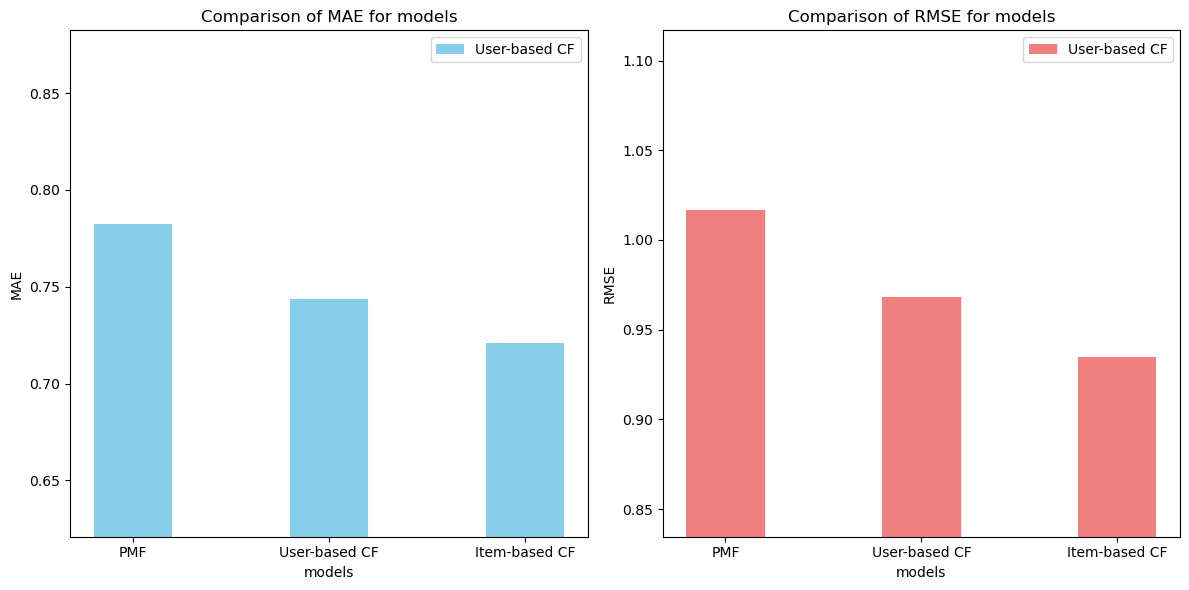

In [122]:
# Question C, D plot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# MAE
axes[0].bar(np.arange(len(list(models.keys()))), [results[metric]['MAE'] for metric in list(models.keys())], width=0.4, color='skyblue', label='User-based CF')
axes[0].set_title('Comparison of MAE for models')
axes[0].set_xlabel('models')
axes[0].set_ylabel('MAE')
axes[0].set_xticks(np.arange(len(list(models.keys()))))
axes[0].set_xticklabels(list(models.keys()))
axes[0].legend()
axes[0].set_ylim(min(min([results[metric]['MAE'] for metric in list(models.keys())]), min([results[metric]['MAE'] for metric in list(models.keys())])) - 0.1, \
                 max(max([results[metric]['MAE'] for metric in list(models.keys())]), max([results[metric]['MAE'] for metric in list(models.keys())])) + 0.1)

# RMSE
axes[1].bar(np.arange(len(list(models.keys()))), [results[metric]['RMSE'] for metric in list(models.keys())], width=0.4, color='lightCoral', label='User-based CF')
axes[1].set_title('Comparison of RMSE for models')
axes[1].set_xlabel('models')
axes[1].set_ylabel('RMSE')
axes[1].set_xticks(np.arange(len(list(models.keys()))))
axes[1].set_xticklabels(list(models.keys()))
axes[1].legend()
axes[1].set_ylim(min(min([results[metric]['RMSE'] for metric in list(models.keys())]), min([results[metric]['RMSE'] for metric in list(models.keys())])) - 0.1, \
                 max(max([results[metric]['RMSE'] for metric in list(models.keys())]), max([results[metric]['RMSE'] for metric in list(models.keys())])) + 0.1)

plt.tight_layout()
plt.show()

In [123]:
# Question E implementation

models = ['User-based CF', 'Item-based CF']
similarity_metrics = ['cosine', 'msd', 'pearson']
results = {"User-based CF": {}, "Item-based CF": {}}

for model_name in models:
    for metric in similarity_metrics:
        model = KNNBasic(sim_options={'user_based': True, 'name': metric}, random_state = 42)
        if model_name == "Item-based CF":
            model = KNNBasic(sim_options={'user_based': False, 'name': metric}, random_state = 42)
        cv_results = cross_validate(model, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
        
        results[model_name][metric] = {
        'MAE': cv_results['test_mae'].mean(),
        'RMSE': cv_results['test_rmse'].mean()
    }

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7608  0.7772  0.7641  0.7672  0.7700  0.7679  0.0056  
RMSE (testset)    0.9841  1.0062  0.9859  0.9929  0.9993  0.9937  0.0082  
Fit time          0.07    0.08    0.09    0.07    0.09    0.08    0.01    
Test time         0.88    1.05    0.97    1.00    0.96    0.97    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
D

In [124]:
# Question E Output

print("\nAverage Results:")
for model_name, metrics in results.items():
    for similarity_metric, metric in metrics.items():
        print(f"{model_name} - {similarity_metric}: MAE={metric['MAE']:.4f}, RMSE={metric['RMSE']:.4f}")


Average Results:
User-based CF - cosine: MAE=0.7679, RMSE=0.9937
User-based CF - msd: MAE=0.7451, RMSE=0.9693
User-based CF - pearson: MAE=0.7742, RMSE=0.9995
Item-based CF - cosine: MAE=0.7743, RMSE=0.9945
Item-based CF - msd: MAE=0.7212, RMSE=0.9353
Item-based CF - pearson: MAE=0.7692, RMSE=0.9906


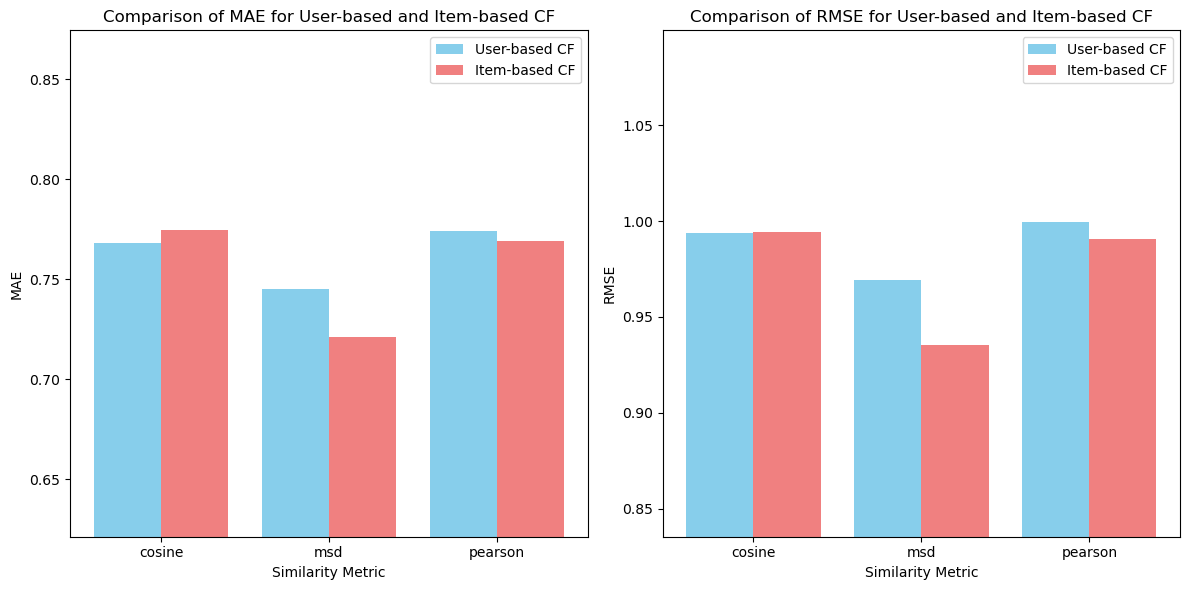

In [125]:
# Question E Plot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# MAE
axes[0].bar(np.arange(len(similarity_metrics)) - 0.2, [results["User-based CF"][metric]['MAE'] for metric in similarity_metrics], width=0.4, color='skyblue', label='User-based CF')
axes[0].bar(np.arange(len(similarity_metrics)) + 0.2, [results["Item-based CF"][metric]['MAE'] for metric in similarity_metrics], width=0.4, color='lightcoral', label='Item-based CF')
axes[0].set_title('Comparison of MAE for User-based and Item-based CF')
axes[0].set_xlabel('Similarity Metric')
axes[0].set_ylabel('MAE')
axes[0].set_xticks(np.arange(len(similarity_metrics)))
axes[0].set_xticklabels(similarity_metrics)
axes[0].legend()
axes[0].set_ylim(min(min([results["User-based CF"][metric]['MAE'] for metric in similarity_metrics]), min([results["Item-based CF"][metric]['MAE'] for metric in similarity_metrics])) - 0.1, \
                 max(max([results["User-based CF"][metric]['MAE'] for metric in similarity_metrics]), max([results["Item-based CF"][metric]['MAE'] for metric in similarity_metrics])) + 0.1)

# RMSE
axes[1].bar(np.arange(len(similarity_metrics)) - 0.2, [results["User-based CF"][metric]['RMSE'] for metric in similarity_metrics], width=0.4, color='skyblue', label='User-based CF')
axes[1].bar(np.arange(len(similarity_metrics)) + 0.2, [results["Item-based CF"][metric]['RMSE'] for metric in similarity_metrics], width=0.4, color='lightcoral', label='Item-based CF')
axes[1].set_title('Comparison of RMSE for User-based and Item-based CF')
axes[1].set_xlabel('Similarity Metric')
axes[1].set_ylabel('RMSE')
axes[1].set_xticks(np.arange(len(similarity_metrics)))
axes[1].set_xticklabels(similarity_metrics)
axes[1].legend()
axes[1].set_ylim(min(min([results["User-based CF"][metric]['RMSE'] for metric in similarity_metrics]), min([results["Item-based CF"][metric]['RMSE'] for metric in similarity_metrics])) - 0.1, \
                 max(max([results["User-based CF"][metric]['RMSE'] for metric in similarity_metrics]), max([results["Item-based CF"][metric]['RMSE'] for metric in similarity_metrics])) + 0.1)

plt.tight_layout()
plt.show()

In [129]:
# Question F, G implementation

models = ['User-based CF', 'Item-based CF']
neighbour_range = np.arange(1, 100, 1)
results = {"User-based CF": {}, "Item-based CF": {}}

for model_name in models:
    for neighbour_value in neighbour_range:
        model = KNNBasic(k= neighbour_value, sim_options={'user_based': True}, random_state = 42)
        if model_name == "Item-based CF":
            model = KNNBasic(k= neighbour_value, sim_options={'user_based': False}, random_state = 42)
        cv_results = cross_validate(model, data, measures=['MAE', 'RMSE'], cv=5, verbose=True)
        
        results[model_name][neighbour_value] = {
        'MAE': cv_results['test_mae'].mean(),
        'RMSE': cv_results['test_rmse'].mean()
    }

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.9115  0.9113  0.9015  0.9038  0.9109  0.9078  0.0043  
RMSE (testset)    1.2222  1.2253  1.2147  1.2118  1.2210  1.2190  0.0050  
Fit time          0.05    0.06    0.06    0.06    0.05    0.06    0.00    
Test time         0.45    0.59    0.48    0.51    0.45    0.49    0.05    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing s

In [132]:
# Question F, G output

print("\nAverage Results:")
best_k_results = {"User-based CF": {"MAE":float('inf'), "MAE_k_value": 0, "RMSE": float('inf'), "RMSE_k_value": 0}, \
                  "Item-based CF": {"MAE":float('inf'), "MAE_k_value": 0, "RMSE": float('inf'), "RMSE_k_value": 0}}
for model_name, metrics in results.items():
    for neighbour_value, metric in metrics.items():
        if best_k_results[model_name]["MAE"] > metric["MAE"]:
            best_k_results[model_name]["MAE"] = metric["MAE"]
            best_k_results[model_name]["MAE_k_value"] = neighbour_value
        if best_k_results[model_name]["RMSE"] > metric["RMSE"]:
            best_k_results[model_name]["RMSE"] = metric["RMSE"]
            best_k_results[model_name]["RMSE_k_value"] = neighbour_value
        print(f"{model_name} - {neighbour_value}: MAE={metric['MAE']:.4f}, RMSE={metric['RMSE']:.4f}")
print()
for model_name, metrics in best_k_results.items():
    print(f"{model_name} - MAE: {best_k_results[model_name]['MAE']:.4f}, K: {best_k_results[model_name]['MAE_k_value']}, RMSE: {best_k_results[model_name]['RMSE']:.4f}, K: {best_k_results[model_name]['RMSE_k_value']}")


Average Results:
User-based CF - 1: MAE=0.9078, RMSE=1.2190
User-based CF - 2: MAE=0.8185, RMSE=1.0745
User-based CF - 3: MAE=0.7845, RMSE=1.0246
User-based CF - 4: MAE=0.7653, RMSE=0.9997
User-based CF - 5: MAE=0.7551, RMSE=0.9874
User-based CF - 6: MAE=0.7473, RMSE=0.9772
User-based CF - 7: MAE=0.7442, RMSE=0.9729
User-based CF - 8: MAE=0.7421, RMSE=0.9700
User-based CF - 9: MAE=0.7405, RMSE=0.9676
User-based CF - 10: MAE=0.7378, RMSE=0.9652
User-based CF - 11: MAE=0.7378, RMSE=0.9652
User-based CF - 12: MAE=0.7374, RMSE=0.9642
User-based CF - 13: MAE=0.7360, RMSE=0.9618
User-based CF - 14: MAE=0.7362, RMSE=0.9617
User-based CF - 15: MAE=0.7383, RMSE=0.9650
User-based CF - 16: MAE=0.7380, RMSE=0.9638
User-based CF - 17: MAE=0.7366, RMSE=0.9622
User-based CF - 18: MAE=0.7375, RMSE=0.9629
User-based CF - 19: MAE=0.7379, RMSE=0.9634
User-based CF - 20: MAE=0.7378, RMSE=0.9626
User-based CF - 21: MAE=0.7393, RMSE=0.9645
User-based CF - 22: MAE=0.7399, RMSE=0.9649
User-based CF - 23: MAE

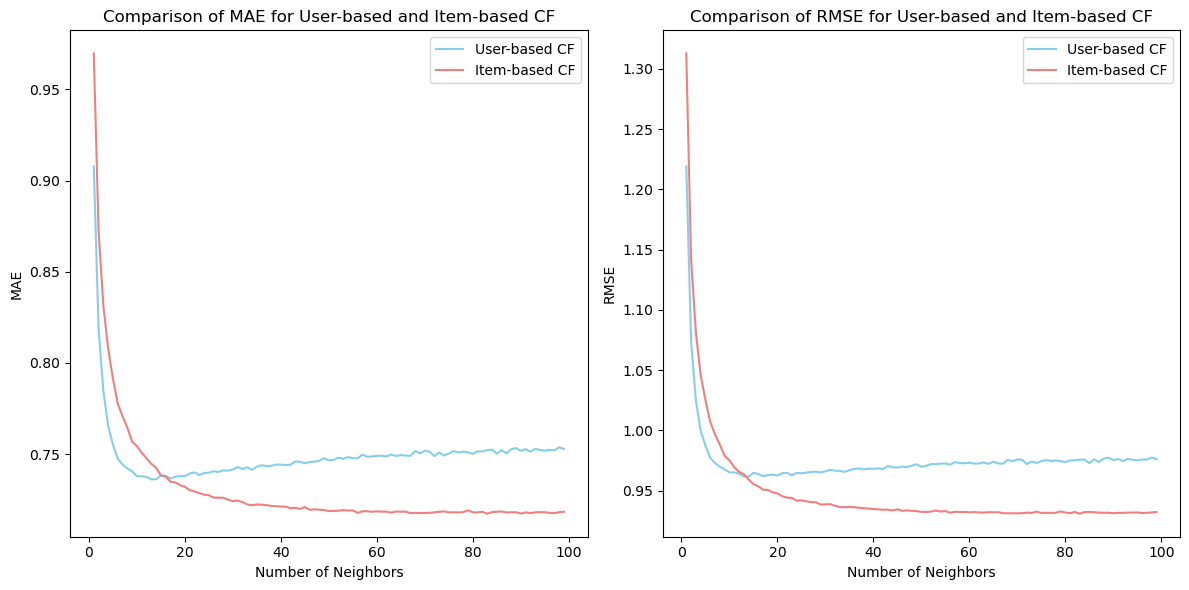

In [135]:
# Question F, G plot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# MAE
axes[0].plot(neighbour_range, [results["User-based CF"][metric]['MAE'] for metric in neighbour_range], marker='', label='User-based CF', color='skyblue')
axes[0].plot(neighbour_range, [results["Item-based CF"][metric]['MAE'] for metric in neighbour_range], marker='', label='Item-based CF', color='lightcoral')
axes[0].set_title('Comparison of MAE for User-based and Item-based CF')
axes[0].set_xlabel('Number of Neighbors')
axes[0].set_ylabel('MAE')
axes[0].legend()
axes[0].grid(False)

# RMSE
axes[1].plot(neighbour_range, [results["User-based CF"][metric]['RMSE'] for metric in neighbour_range], marker='', label='User-based CF', color='skyblue')
axes[1].plot(neighbour_range, [results["Item-based CF"][metric]['RMSE'] for metric in neighbour_range], marker='', label='Item-based CF', color='lightcoral')
axes[1].set_title('Comparison of RMSE for User-based and Item-based CF')
axes[1].set_xlabel('Number of Neighbors')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].grid(False)

plt.tight_layout()
plt.show()